# Visualise forward Euler and Verlet integrators

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import setpath
from dynamical_system import *
from time_integrator import *

In [3]:
np.random.seed(2512517)
mass = 1.2
k_spring = 0.9
dt = 0.1
T_final = 20.0
dynamical_system = HarmonicOscillator(mass,k_spring)
q = np.zeros(1)
p = np.zeros(1)
q[0] = 1.0
p[0] = 0.0

## Plot phase space diagram and energy diagram

ForwardEuler    : ||(q,p)-(q,p)_fast|| = 0.0000e+00
Verlet          : ||(q,p)-(q,p)_fast|| = 0.0000e+00
StrangSplitting : ||(q,p)-(q,p)_fast|| = 0.0000e+00
RK4             : ||(q,p)-(q,p)_fast|| = 0.0000e+00
Exact           : ||(q,p)-(q,p)_fast|| = 0.0000e+00


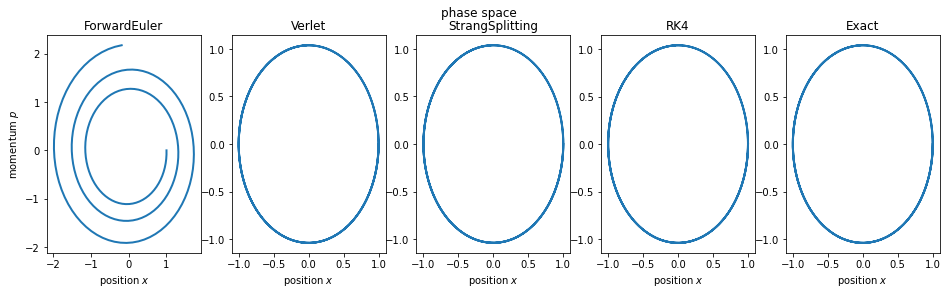

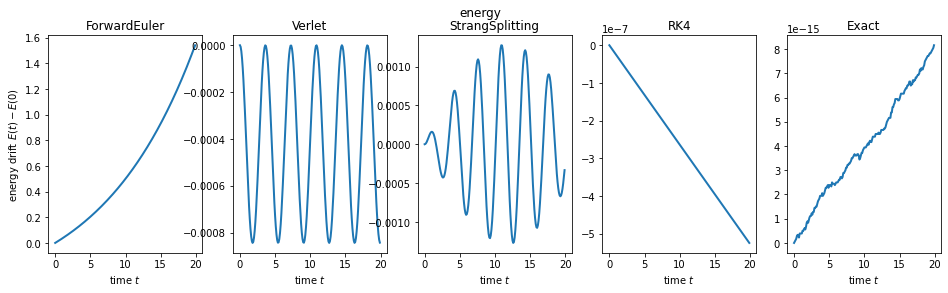

In [5]:
n_step = int(T_final/dt)

integrator_classes = (ForwardEulerIntegrator, VerletIntegrator, StrangSplittingIntegrator, RK4Integrator, ExactIntegrator)
n_integrators = len(integrator_classes)

energies = np.zeros(n_step)
q_phase = np.zeros(n_step)
p_phase = np.zeros(n_step)

figs_phasespace, axs_phasespace = plt.subplots(1,n_integrators,figsize=(16,4))
figs_phasespace.suptitle('phase space')
figs_energy, axs_energy = plt.subplots(1,n_integrators,figsize=(16,4))
figs_energy.suptitle('energy')

T = dt*np.arange(n_step)

for j, cls in enumerate(integrator_classes):
    integrator = cls(dynamical_system,dt)
    integrator.set_state(q,p)
    for k in range(n_step):
        energies[k] = dynamical_system.energy(integrator.q,integrator.p)
        q_phase[k] = integrator.q[0]
        p_phase[k] = integrator.p[0]
        integrator.integrate(1)
    axs_phasespace[j].plot(q_phase[:],p_phase[:],linewidth=2)
    axs_phasespace[j].set_title(integrator.label)
    axs_phasespace[j].set_xlabel('position $x$')
    if j==0:
        axs_phasespace[j].set_ylabel('momentum $p$')
        axs_energy[j].set_ylabel('energy drift $E(t)-E(0)$')
    axs_energy[j].plot(T,energies[:]-energies[0],linewidth=2)
    axs_energy[j].set_xlabel('time $t$')
    axs_energy[j].set_title(integrator.label)
    # check that C and Fortran implementation give the same results
    integrator.set_state(q,p)
    integrator.fast_code = True
    integrator.integrate(100)
    qp_final_fast = np.asarray(integrator.q[0], integrator.q[0])
    integrator.set_state(q,p)
    integrator.fast_code = False
    integrator.integrate(100)
    qp_final = np.asarray(integrator.q[0], integrator.p[0])    
    diff = np.linalg.norm(qp_final-qp_final_fast)
    print (f'{integrator.label:16s}: ||(q,p)-(q,p)_fast|| = {diff:8.4e}')

